In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
data=pd.read_csv("2024_State_Employee_Pay.csv")
data.head(5)

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
0,2024,AGRICULTURE,ACCOUNTANT,"OTTO, BRIDGET",55819.64
1,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"STOEHR, KALEB J.",59947.10
2,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"WALKER, JOE E.",8010.72
3,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"BROWN, LISA RENEE",13880.70
4,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"EVANS, MICHELLE R.",10455.10


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72868 entries, 0 to 72867
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Calendar Year   72868 non-null  int64  
 1   Agency Name     72868 non-null  object 
 2   Position Title  72868 non-null  object 
 3   Employee Name   72868 non-null  object 
 4   YTD Gross Pay   72868 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [59]:
data.isnull().sum()

Calendar Year     0
Agency Name       0
Position Title    0
Employee Name     0
YTD Gross Pay     0
dtype: int64

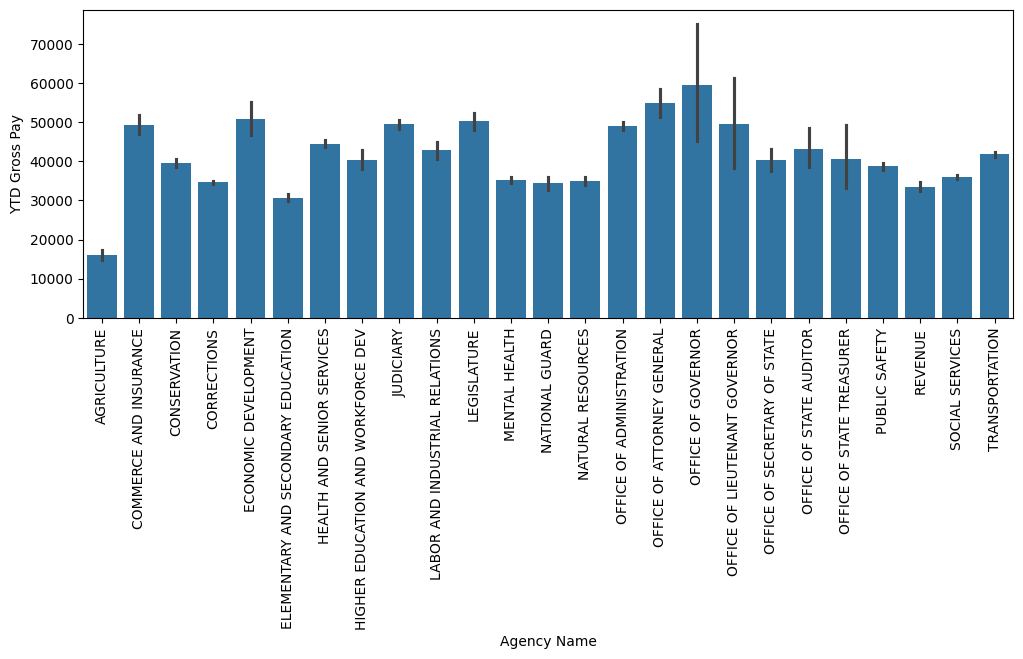

In [60]:
plt.figure(figsize=(12,4))
sns.barplot(x="Agency Name",y="YTD Gross Pay",data=data)
plt.xticks(rotation=90)
plt.show()

In [61]:
data=data.drop(["Employee Name"],axis=1)

In [62]:
le=LabelEncoder()
ss=StandardScaler()
data["Agency Name"]=le.fit_transform(data["Agency Name"])
data["Position Title"]=le.fit_transform(data["Position Title"])

In [63]:
x=data.drop(["YTD Gross Pay"],axis=1)
y=data["YTD Gross Pay"]
x=ss.fit_transform(x)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [74]:
def evaluate_models(x_train,x_test,y_tarin,y_test):
    models={
        "Linear Regression":LinearRegression(),
        "Random Forest Regression":RandomForestRegressor(),
        "Decision Tree Regressor":DecisionTreeRegressor(),
        "K-Nearest Neighbours":KNeighborsRegressor()
    }
    result={}
    for name ,model in models.items():
        model.fit(x_train,y_train)
        prediction=model.predict(x_test)
        mse=mean_squared_error(y_test,prediction)
        result[name]={"mse_Score":mse*100}

    result_frame=pd.DataFrame(result).T

    return result_frame

In [75]:
result_frame=evaluate_models(x_train,x_test,y_train,y_test)
result_frame

,mse_Score
Linear Regression,8.828262e+10
Random Forest Regression,4.274279e+10
Decision Tree Regressor,4.417294e+10
K-Nearest Neighbours,5.019630e+10
